In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data


In [2]:
df=yf.Ticker('AAPL')
df2=df.history(period= "10y")
df2=df2.reset_index()
df2.head()

AAPL: No data found for this date range, symbol may be delisted


,Date,Open,High,Low,Close,Adj Close,Volume


In [3]:
df2=df2.drop(['Date','Dividends','Stock Splits'],axis=1)
df2
# start= "2010-01-01"
# end="2019-12-31"

# df = data.DataReader('AAPL', 'yahoo', start, end)
# df.head()

KeyError: "['Dividends', 'Stock Splits'] not found in axis"

In [ ]:
ma100 = df2.Close.rolling(100).mean()
ma100
ma200 = df2.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2514    151.767611
2515    151.647595
2516    151.528087
2517    151.404179
2518    151.251398
Name: Close, Length: 2519, dtype: float64

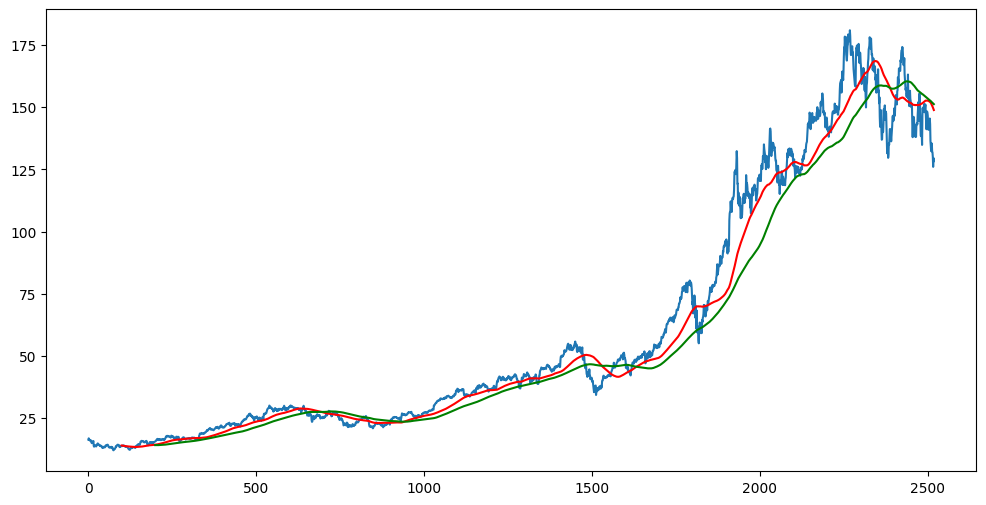

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df2.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"g")


In [ ]:
df2.shape

(2519, 5)

In [ ]:
data_training = pd.DataFrame(df2['Close'][0:int(len(df2)*0.70)])
data_testing = pd.DataFrame(df2['Close'][int(len(df2)*0.70):int(len(df2))])
print(data_training.shape)
print(data_testing.shape)

(1763, 1)
(756, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.07151174],
       [0.08016306],
       [0.07660705],
       ...,
       [0.9842464 ],
       [0.9912845 ],
       [1.        ]])

In [ ]:
x_train =[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train =np.array(x_train), np.array(y_train)

In [ ]:
#ML

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model =Sequential()
model.add(LSTM(units= 50,activation = 'relu', return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 21s 253ms/step - loss: 0.0317
Epoch 2/50
52/52 [==============================] - 13s 241ms/step - loss: 0.0065
Epoch 3/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0052
Epoch 4/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0059
Epoch 5/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0048
Epoch 6/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0044
Epoch 7/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0046
Epoch 8/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0039
Epoch 9/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0041
Epoch 10/50
52/52 [==============================] - 13s 241ms/step - loss: 0.0040
Epoch 11/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0035
Epoch 12/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0033
Epoch 13/50
5

In [ ]:
model.save("Keras_model.h5")

In [ ]:

data_testing.head()
data_training.tail(100)

,Close
1663,49.078995
1664,48.954460
1665,51.027603
1666,49.508774
1667,49.262142
...,...
1758,69.623238
1759,71.004570
1760,70.977631
1761,71.398903


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df= past_100_days.append(data_testing,ignore_index=True)
final_df.head()

C:\Users\AYAN\AppData\Local\Temp\ipykernel_10256\1743783949.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing,ignore_index=True)


,Close
0,49.078995
1,48.954460
2,51.027603
3,49.508774
4,49.262142


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[9.43406313e-04],
       [0.00000000e+00],
       [1.57050016e-02],
       [4.19917820e-03],
       [2.33083143e-03],
       [1.11359281e-02],
       [1.82577702e-02],
       [1.82762938e-02],
       [2.24938512e-02],
       [2.21609744e-02],
       [3.99562021e-03],
       [1.11174334e-02],
       [6.80743108e-03],
       [9.34161822e-03],
       [1.57789806e-02],
       [1.52795931e-02],
       [9.65608699e-03],
       [1.61119731e-02],
       [2.36777472e-02],
       [2.36407288e-02],
       [2.53240991e-02],
       [3.00041411e-02],
       [4.27494026e-02],
       [4.18244911e-02],
       [3.37962611e-02],
       [3.59235635e-02],
       [3.74034335e-02],
       [4.12325719e-02],
       [3.78844129e-02],
       [3.19094774e-02],
       [3.37407768e-02],
       [3.18169458e-02],
       [3.80138185e-02],
       [3.59050976e-02],
       [3.39257534e-02],
       [4.34522614e-02],
       [4.45992835e-02],
       [3.41847378e-02],
       [3.76254573e-02],
       [4.90757676e-02],


In [ ]:
input_data.shape

(856, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [ ]:
#Making prediction
y_predicted =model.predict(x_test)


24/24 [==============================] - 3s 77ms/step


In [ ]:
scaler.scale_

array([0.01670676])

In [ ]:
scale_factor=1/ 0.01670676
y_predicted=y_predicted* scale_factor
y_test=y_test*scale_factor

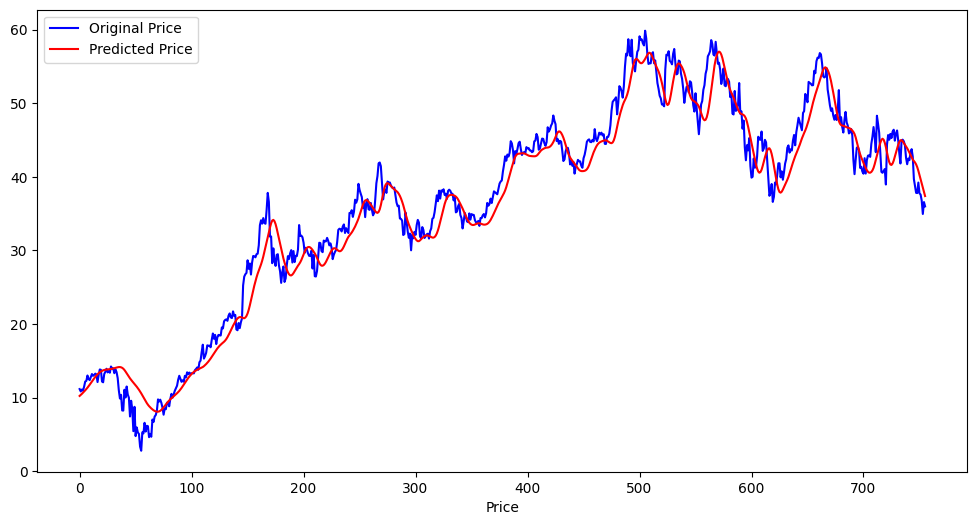

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, "b", label = "Original Price")
plt.plot(y_predicted, "r", label = "Predicted Price")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()
plt.show()